In [1]:
import os
import sys
import pickle
import warnings

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import pandas as pd

sys.path.append("..")

from src.pickle_manager import open_pickle

warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
rf = open_pickle(os.path.join("..", "data", "models"), "rf_classifier.pkl")
lr = open_pickle(os.path.join("..", "data", "models"), "log_reg.pkl")
xgb = open_pickle(os.path.join("..", "data", "models"), "xgb_classifier.pkl")

data = open_pickle(os.path.join("..", "data", "pkls"), "processed_dataset.pkl")
X_train, X_test, y_train, y_test = (
    data["X_train"],
    data["X_test"],
    data["y_train"],
    data["y_test"],
)

In [3]:
y_train = pd.DataFrame(y_train, columns=['lifetime'])
y_test = pd.DataFrame(y_test, columns=['lifetime'])

In [4]:
def classify_lifetime(lifetime):
    if lifetime <= 12:
        return 0
    elif 12 < lifetime <= 24:
        return 1
    elif 24 < lifetime <= 48:
        return 2
    elif 48 < lifetime <= 120:
        return 3
    elif lifetime > 120:
        return 4
    
y_train['lifetime'] = y_train['lifetime'].apply(classify_lifetime)
y_test['lifetime'] = y_test['lifetime'].apply(classify_lifetime)

Classification Report for Random Forest (Train):
              precision    recall  f1-score   support

           0     0.4664    0.5720    0.5139    714647
           1     0.4277    0.4138    0.4206    890807
           2     0.4785    0.4835    0.4810    990751
           3     0.7625    0.6809    0.7194   1098623
           4     0.9206    0.8901    0.9051    770579

    accuracy                         0.6025   4465407
   macro avg     0.6112    0.6081    0.6080   4465407
weighted avg     0.6126    0.6025    0.6061   4465407

Classification Report for Random Forest (Test):
              precision    recall  f1-score   support

           0     0.4675    0.5726    0.5147    178424
           1     0.4277    0.4142    0.4208    222169
           2     0.4789    0.4835    0.4811    247672
           3     0.7636    0.6813    0.7201    274612
           4     0.9206    0.8926    0.9064    193475

    accuracy                         0.6035   1116352
   macro avg     0.6116    0.6088 

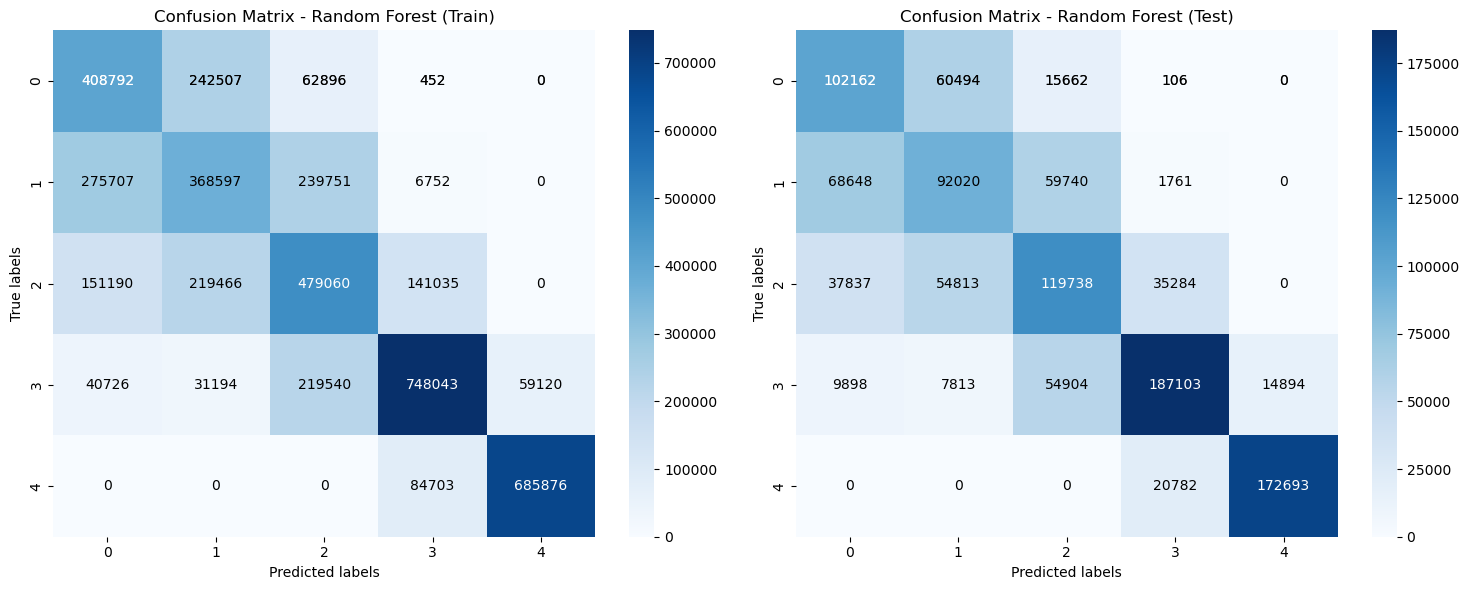

Classification Report for Logistic Regression (Train):
              precision    recall  f1-score   support

           0     0.4604    0.5586    0.5047    714647
           1     0.4162    0.3516    0.3812    890807
           2     0.4473    0.4760    0.4612    990751
           3     0.7355    0.6989    0.7167   1098623
           4     0.9171    0.8897    0.9032    770579

    accuracy                         0.5906   4465407
   macro avg     0.5953    0.5949    0.5934   4465407
weighted avg     0.5952    0.5906    0.5913   4465407

Classification Report for Logistic Regression (Test):
              precision    recall  f1-score   support

           0     0.4615    0.5595    0.5058    178424
           1     0.4160    0.3516    0.3811    222169
           2     0.4474    0.4755    0.4610    247672
           3     0.7367    0.6998    0.7178    274612
           4     0.9171    0.8922    0.9045    193475

    accuracy                         0.5917   1116352
   macro avg     0.595

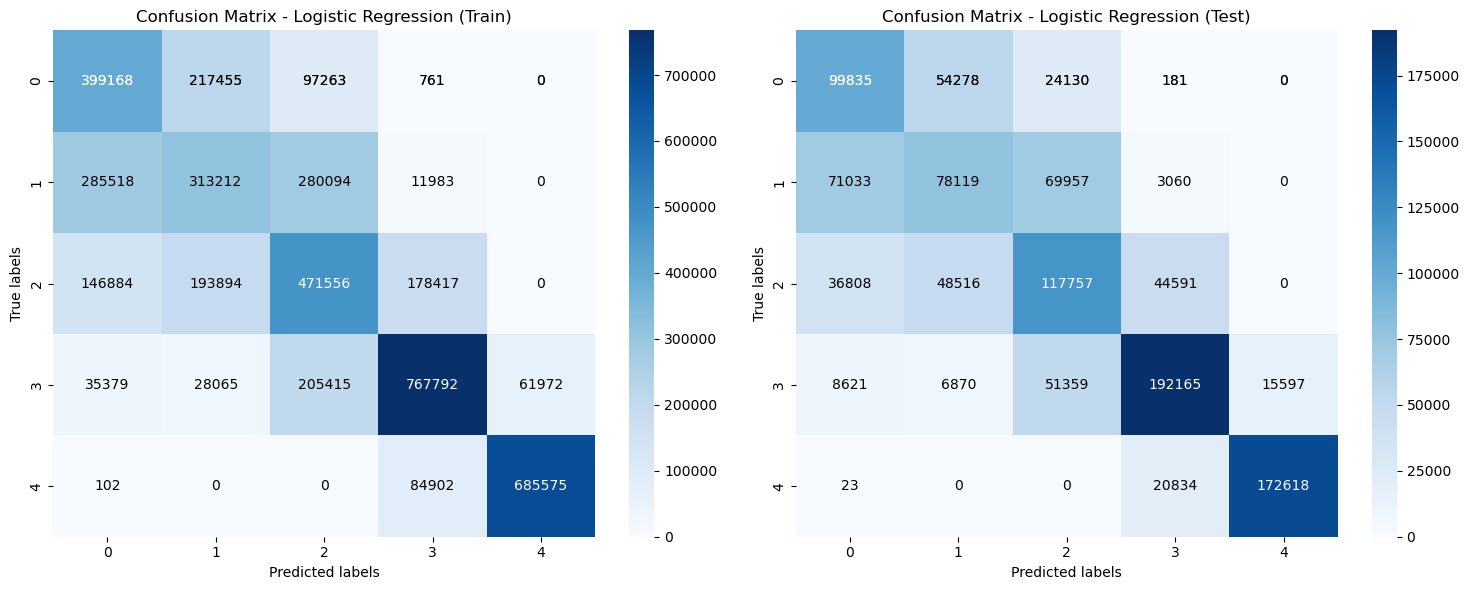

Classification Report for XGBoost (Train):
              precision    recall  f1-score   support

           0     0.4571    0.6502    0.5368    714647
           1     0.4310    0.4002    0.4151    890807
           2     0.5078    0.4793    0.4931    990751
           3     0.7764    0.6627    0.7150   1098623
           4     0.9186    0.8926    0.9054    770579

    accuracy                         0.6073   4465407
   macro avg     0.6182    0.6170    0.6131   4465407
weighted avg     0.6213    0.6073    0.6103   4465407

Classification Report for XGBoost (Test):
              precision    recall  f1-score   support

           0     0.4588    0.6524    0.5387    178424
           1     0.4327    0.4017    0.4166    222169
           2     0.5083    0.4799    0.4937    247672
           3     0.7776    0.6627    0.7155    274612
           4     0.9185    0.8951    0.9066    193475

    accuracy                         0.6088   1116352
   macro avg     0.6192    0.6183    0.6142   

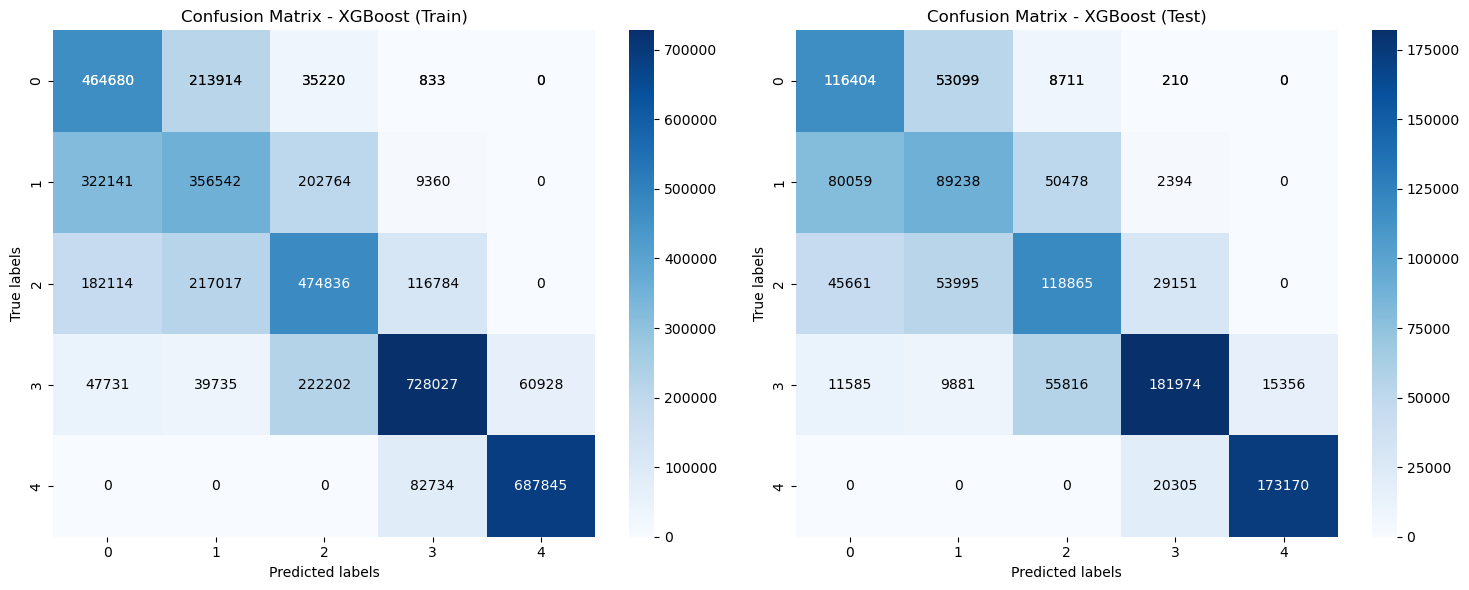

In [6]:
# Function to plot confusion matrix with annotations
def plot_confusion_matrix(cm, classes, ax, title):
    # Plot the heatmap
    sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap='Blues', cbar=True)

    # Set labels and title
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title(title)
    ax.xaxis.set_ticklabels(classes)
    ax.yaxis.set_ticklabels(classes)

    # Loop over data dimensions and create text annotations with contrast colors.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j+0.5, i+0.5, format(cm[i, j], 'd'),
                    ha="center", va="center",
                    color="white" if cm[i, j] > cm.max() / 2 else "black")

# Update the evaluate_model function to use the plot_confusion_matrix function
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Classification report
    print(f"Classification Report for {model_name} (Train):")
    print(classification_report(y_train, y_train_pred, digits=4))
    print(f"Classification Report for {model_name} (Test):")
    print(classification_report(y_test, y_test_pred, digits=4))

    # Confusion Matrices
    train_conf_mat = confusion_matrix(y_train, y_train_pred)
    test_conf_mat = confusion_matrix(y_test, y_test_pred)

    # Plotting Confusion Matrices
    fig, ax = plt.subplots(1, 2, figsize=(15, 6))
    class_names = np.unique(y_train)  # Assuming class names are numerical and ordered
    plot_confusion_matrix(train_conf_mat, class_names, ax[0], f"Confusion Matrix - {model_name} (Train)")
    plot_confusion_matrix(test_conf_mat, class_names, ax[1], f"Confusion Matrix - {model_name} (Test)")

    plt.tight_layout()
    plt.show()

# Evaluate each model
for model, name in zip([rf, lr, xgb], ["Random Forest", "Logistic Regression", "XGBoost"]):
    evaluate_model(model, X_train, y_train, X_test, y_test, name)